In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-64-convsim-xxc3-3"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898 
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248 

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
os.makedirs(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME + "_checkpoints")), exist_ok=False)

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)
            
checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME + "_checkpoint_THREE_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience=80, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
274/274 [==============================] - 9s 17ms/step - loss: 0.0723 - val_loss: 0.0302
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_01-0.03\assets
Epoch 2/320
  3/274 [..............................] - ETA: 11s - loss: 0.0368

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 16ms/step - loss: 0.0323 - val_loss: 0.0301
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_02-0.03\assets
Epoch 3/320
  5/274 [..............................] - ETA: 10s - loss: 0.0345

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 15ms/step - loss: 0.0297 - val_loss: 0.0237
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_03-0.02\assets
Epoch 4/320
  4/274 [..............................] - ETA: 11s - loss: 0.0311

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 15ms/step - loss: 0.0285 - val_loss: 0.0266
Epoch 5/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0280 - val_loss: 0.0228
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_05-0.02\assets
Epoch 6/320
  5/274 [..............................] - ETA: 8s - loss: 0.0294

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 5s 17ms/step - loss: 0.0275 - val_loss: 0.0234
Epoch 7/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0272 - val_loss: 0.0228
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_07-0.02\assets
Epoch 8/320
  3/274 [..............................] - ETA: 9s - loss: 0.0289

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 15ms/step - loss: 0.0270 - val_loss: 0.0249
Epoch 9/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0267 - val_loss: 0.0216
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_09-0.02\assets
Epoch 10/320
  4/274 [..............................] - ETA: 10s - loss: 0.0267

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 5s 17ms/step - loss: 0.0265 - val_loss: 0.0242
Epoch 11/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0263 - val_loss: 0.0248
Epoch 12/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0261 - val_loss: 0.0225
Epoch 13/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0259 - val_loss: 0.0231
Epoch 14/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0259 - val_loss: 0.0215
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_14-0.02\assets
Epoch 15/320
  4/274 [..............................] - ETA: 10s - loss: 0.0280

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 15ms/step - loss: 0.0258 - val_loss: 0.0212
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_15-0.02\assets
Epoch 16/320
  5/274 [..............................] - ETA: 7s - loss: 0.0250

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 16ms/step - loss: 0.0256 - val_loss: 0.0239
Epoch 17/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0256 - val_loss: 0.0277
Epoch 18/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0255 - val_loss: 0.0220
Epoch 19/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0254 - val_loss: 0.0217
Epoch 20/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0253 - val_loss: 0.0337
Epoch 21/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0253 - val_loss: 0.0211
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3_checkpoint_THREE__weights_21-0.02\assets
Epoch 22/320
  5/274 [..............................] - ETA: 7s - loss: 0.0241

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 4s 15ms/step - loss: 0.0252 - val_loss: 0.0254
Epoch 23/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0252 - val_loss: 0.0307
Epoch 24/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0251 - val_loss: 0.0329
Epoch 25/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0251 - val_loss: 0.0220
Epoch 26/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0249 - val_loss: 0.0223
Epoch 27/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0249 - val_loss: 0.0260
Epoch 28/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0249 - val_loss: 0.0219
Epoch 29/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0249 - val_loss: 0.0290
Epoch 30/320
274/274 [==============================] - 4s 15ms/step - loss: 0.0248 - val_loss: 0.0330
Epoch 31/320
274/274 [==============================] - 4s 16ms/step - loss: 0.0248 - 

274/274 [==============================] - 4s 15ms/step - loss: 0.0229 - val_loss: 0.0257
Restoring model weights from the end of the best epoch.
Epoch 00101: early stopping
Train size:8738
Valid.size:2208
--- 458.06142354011536 seconds ---


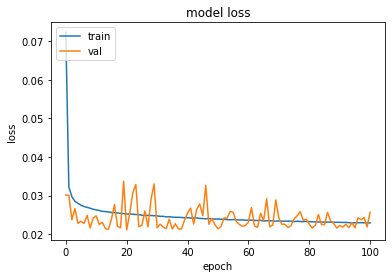

Best Epoch:21


In [8]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [9]:
best_epochs = np.argmin(hist.history['val_loss']) + 1
print(best_epochs)

21


In [10]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-3\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [11]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2208
Best RMSENZ  =2007 (0.91)
Best MAENZ   =2015 (0.91)
Best PSNR    =2007 (0.91)
Best Accuracy=1998 (0.90)
RMSE-NZ  Pred=0.0261  Noisy=0.0943
MAE-NZ   Pred=0.0214  Noisy=0.0903
PSNR     Pred=19.4 dB Noisy=9.4 dB
Accuracy Pred=0.39    Noisy=0.09
SSM      Pred=0.94    Noisy=0.65
HOG MSE  Pred=0.11    Noisy=0.12


In [12]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:19
Nitid files:19
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_nitid_idx134.tif


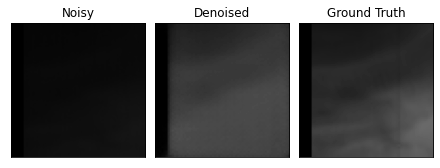

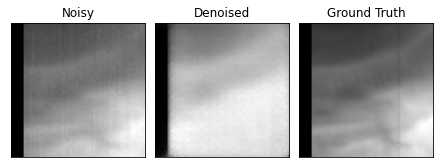

RMSE-NZ  Pred=0.0567  Noisy=0.1722 BEST
MAE-NZ   Pred=0.0495  Noisy=0.1588 BEST
PSNR     Pred=17.3 dB Noisy=7.7 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.34
HOG MSE  Pred=0.04    Noisy=0.04
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


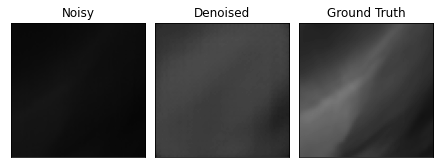

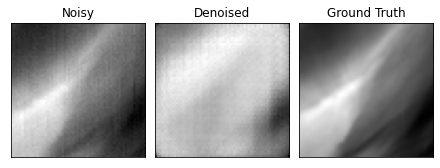

RMSE-NZ  Pred=0.0779  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0641  Noisy=0.1954 BEST
PSNR     Pred=15.6 dB Noisy=6.9 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.79    Noisy=0.40
HOG MSE  Pred=0.18    Noisy=0.13
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


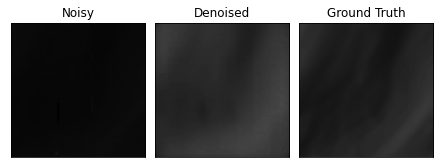

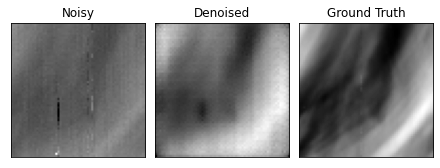

RMSE-NZ  Pred=0.0590  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0575  Noisy=0.0953 BEST
PSNR     Pred=11.5 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.33
HOG MSE  Pred=0.08    Noisy=0.16
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


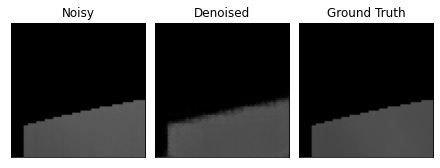

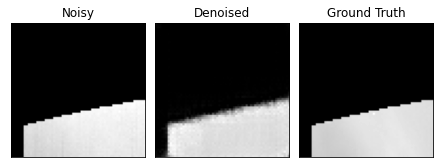

RMSE-NZ  Pred=0.0235  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0097  Noisy=0.0376 BEST
PSNR     Pred=23.4 dB Noisy=19.0 dB BEST
Accuracy Pred=0.78    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.93
HOG MSE  Pred=0.22    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


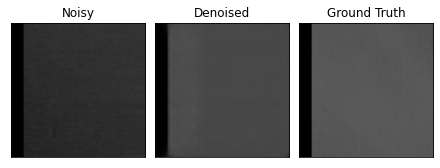

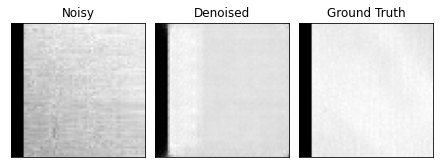

RMSE-NZ  Pred=0.0570  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0535  Noisy=0.1622 BEST
PSNR     Pred=16.0 dB Noisy=6.9 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.84
HOG MSE  Pred=0.00    Noisy=0.01
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_nitid_idx134.tif


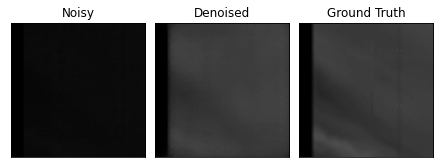

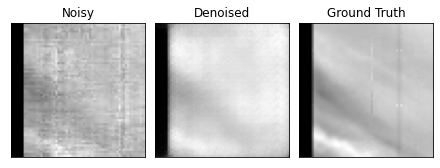

RMSE-NZ  Pred=0.0158  Noisy=0.1870 BEST
MAE-NZ   Pred=0.0118  Noisy=0.1854 BEST
PSNR     Pred=25.6 dB Noisy=4.2 dB BEST
Accuracy Pred=0.51    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.30
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


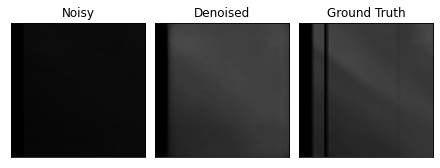

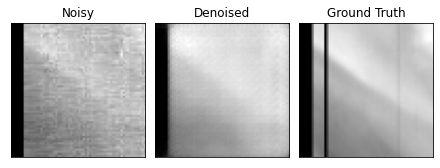

RMSE-NZ  Pred=0.0373  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0224  Noisy=0.1661 BEST
PSNR     Pred=17.8 dB Noisy=4.6 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.31
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


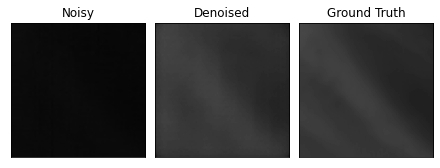

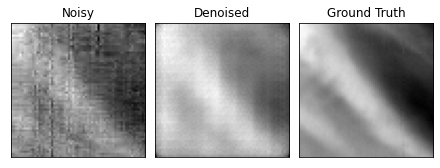

RMSE-NZ  Pred=0.0153  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0122  Noisy=0.1619 BEST
PSNR     Pred=25.2 dB Noisy=4.6 dB BEST
Accuracy Pred=0.47    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.33
HOG MSE  Pred=0.10    Noisy=0.35
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_nitid_idx134.tif


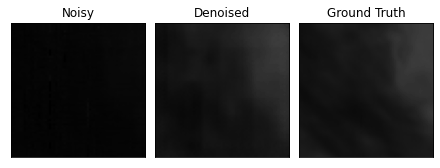

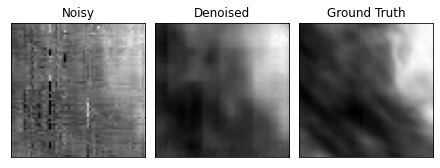

RMSE-NZ  Pred=0.0137  Noisy=0.0964 BEST
MAE-NZ   Pred=0.0107  Noisy=0.0856 BEST
PSNR     Pred=24.8 dB Noisy=7.9 dB BEST
Accuracy Pred=0.56    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.41
HOG MSE  Pred=0.03    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_nitid_idx146.tif


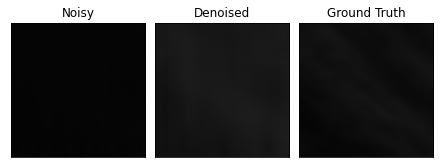

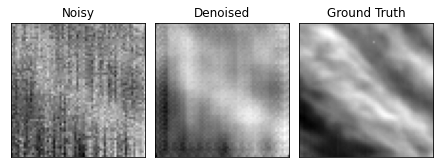

RMSE-NZ  Pred=0.0368  Noisy=0.0368 BEST
MAE-NZ   Pred=0.0359  Noisy=0.0345 WORST
PSNR     Pred=7.3 dB Noisy=7.3 dB BEST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.85    Noisy=0.43
HOG MSE  Pred=0.12    Noisy=0.22
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


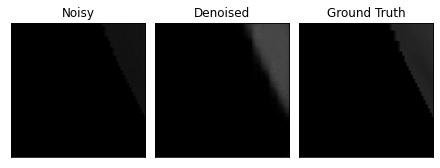

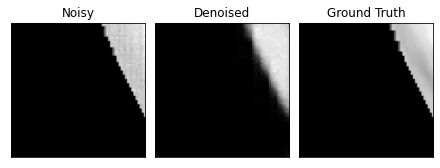

RMSE-NZ  Pred=0.0440  Noisy=0.0366 WORST
MAE-NZ   Pred=0.0175  Noisy=0.0184 BEST
PSNR     Pred=12.4 dB Noisy=14.0 dB WORST
Accuracy Pred=0.82    Noisy=0.74 BEST
SSM      Pred=0.91    Noisy=0.85
HOG MSE  Pred=0.26    Noisy=0.02
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


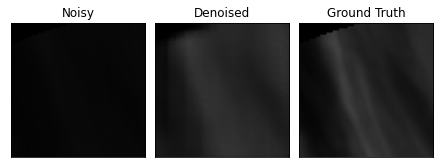

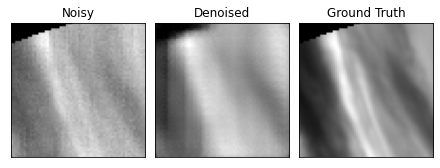

RMSE-NZ  Pred=0.0250  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0212  Noisy=0.0979 BEST
PSNR     Pred=20.1 dB Noisy=7.3 dB BEST
Accuracy Pred=0.20    Noisy=0.01 BEST
SSM      Pred=0.88    Noisy=0.35
HOG MSE  Pred=0.05    Noisy=0.13
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


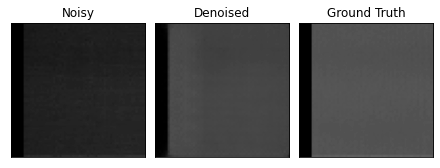

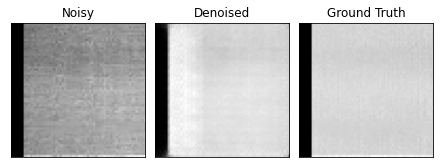

RMSE-NZ  Pred=0.0544  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0502  Noisy=0.1947 BEST
PSNR     Pred=17.1 dB Noisy=6.0 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.71
HOG MSE  Pred=0.00    Noisy=0.02
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


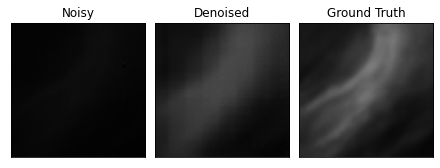

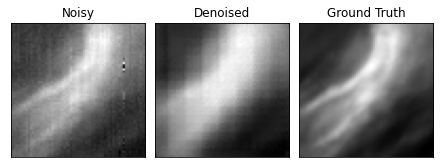

RMSE-NZ  Pred=0.0636  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0498  Noisy=0.1660 BEST
PSNR     Pred=17.6 dB Noisy=8.0 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.84    Noisy=0.37
HOG MSE  Pred=0.04    Noisy=0.09
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


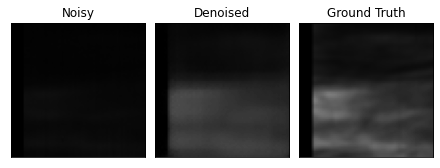

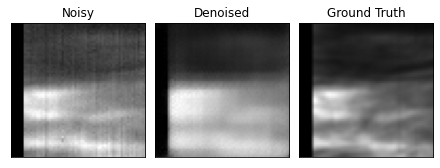

RMSE-NZ  Pred=0.0480  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0317  Noisy=0.1438 BEST
PSNR     Pred=20.3 dB Noisy=9.1 dB BEST
Accuracy Pred=0.28    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.43
HOG MSE  Pred=0.02    Noisy=0.05
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


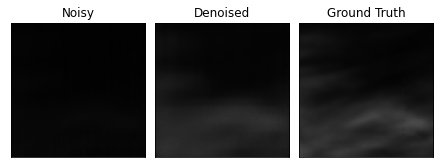

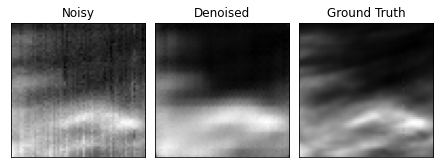

RMSE-NZ  Pred=0.0249  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0179  Noisy=0.0772 BEST
PSNR     Pred=21.3 dB Noisy=9.4 dB BEST
Accuracy Pred=0.44    Noisy=0.04 BEST
SSM      Pred=0.93    Noisy=0.55
HOG MSE  Pred=0.04    Noisy=0.12
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


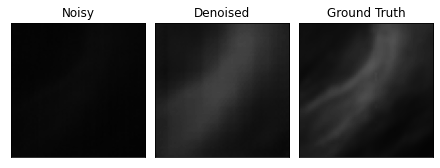

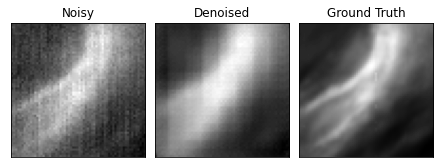

RMSE-NZ  Pred=0.0236  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0199  Noisy=0.1019 BEST
PSNR     Pred=23.1 dB Noisy=8.8 dB BEST
Accuracy Pred=0.25    Noisy=0.02 BEST
SSM      Pred=0.90    Noisy=0.36
HOG MSE  Pred=0.04    Noisy=0.14
******************************************************
Index:17
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


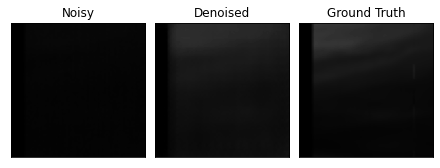

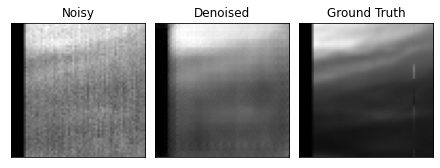

RMSE-NZ  Pred=0.0227  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0190  Noisy=0.0512 BEST
PSNR     Pred=19.9 dB Noisy=10.0 dB BEST
Accuracy Pred=0.26    Noisy=0.21 BEST
SSM      Pred=0.87    Noisy=0.47
HOG MSE  Pred=0.09    Noisy=0.10
******************************************************
Index:18
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


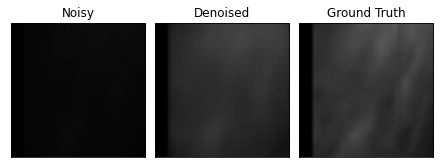

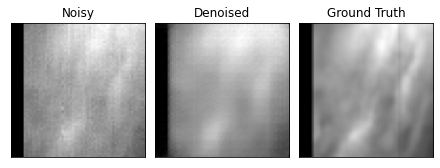

RMSE-NZ  Pred=0.0368  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0322  Noisy=0.1780 BEST
PSNR     Pred=19.4 dB Noisy=5.5 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************


In [13]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )